In [1]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import GridSearchCV

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
mush = pd.read_csv('training_mush.csv')

In [3]:
mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [5]:
params = {'n_estimators': range(10, 60, 10),
         'max_depth': range(1, 13, 2),
         'min_samples_leaf': range (1, 8),
         'min_samples_split': range (2, 10, 2)}

In [7]:
X = mush.drop(['class'], axis=1)
y = mush.pop('class')

In [11]:
clf = RandomForestClassifier(random_state = 0)

In [12]:
search = GridSearchCV(clf, params, cv=3)

In [13]:
search.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [14]:
best_tree = search.best_estimator_
best_tree

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [15]:
best_tree.feature_importances_

array([0.00257742, 0.00312957, 0.02177298, 0.07010933, 0.18837641,
       0.        , 0.0808402 , 0.06846076, 0.10386114, 0.00756262,
       0.10379322, 0.03180155, 0.04829594, 0.01768932, 0.00625335,
       0.        , 0.0108812 , 0.0139101 , 0.07072612, 0.08356419,
       0.04378343, 0.02261118])

In [17]:
mush_test = pd.read_csv('testing_mush.csv')

In [19]:
prediction = best_tree.predict(mush_test)

In [20]:
count = 0
for p in prediction:
    if p == 1:
        count +=1
count

976

In [23]:
mush_true = pd.read_csv('testing_y_mush.csv')

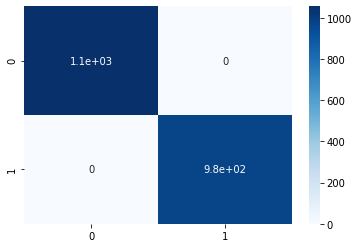

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusion_matrix(mush_true, prediction)
sns.heatmap(confusion_matrix(mush_true, prediction), annot=True, cmap="Blues")

-----------------------------------------------------------
-----------------------------------------------------------

In [46]:
data_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')
data_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

In [47]:
data_train.head(20)

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
5,cruiser,11.839620,11.175053,14.148615,0.727049,366230,344.868989
6,transport,3.583082,9.118069,62.573389,0.529416,268752,48.811194
7,fighter,16.185380,3.686698,561.239067,0.177024,130305,11.063792
8,transport,3.428605,7.933889,63.785882,0.445259,358659,46.378304
9,transport,3.632056,8.945299,62.771709,0.361815,493153,43.070987


In [48]:
X = data_train.drop(['class'], axis=1)
y = data_train.pop('class')

In [49]:
y = pd.factorize(y)[0]

In [50]:
clf = RandomForestClassifier()

In [51]:
y.shape

(500,)

In [52]:
params = {'n_estimators': range(10, 60, 10),
         'max_depth': range(1, 13, 2),
         'min_samples_leaf': range (1, 8),
         'min_samples_split': range (2, 10, 2)}
search = GridSearchCV(clf, params, cv=3)

In [53]:
search.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [54]:
best_tree = search.best_estimator_

In [56]:
p = best_tree.predict(data_test)

In [63]:
count_transport = 0
count_fighter = 0
count_cruiser = 0

count = 0
for pred in p:
    if pred == 0:
        count_transport +=1
    elif pred == 1:
        count_fighter +=1
    elif pred == 2:
        count_cruiser +=1
        
print ("transport: " + str(count_transport) + " fighter: " + str(count_fighter) + " cruiser: " + str(count_cruiser))

transport: 595 fighter: 675 cruiser: 230


In [64]:
best_tree.feature_importances_

array([0.10283453, 0.03955995, 0.07932742, 0.45821034, 0.        ,
       0.32006777])

In [65]:
best_tree

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

-----------------------------------------
-----------------------------------------

In [66]:
dataframe = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')

In [67]:
dataframe.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000
